# Creating final data for crop and fertilizer recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

,Unnamed: 0,No,Crop,N,P,K,pH,Soil_Moisture
0,0,1,almonds,45,20,35,6.5,25
1,1,2,anise,40,15,30,6.0,20
2,2,3,apples,50,25,40,6.3,30
3,3,4,apricots,55,30,45,6.4,28
4,4,5,artichokes,40,20,35,6.8,35


In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

,No,N,P,K,pH,Soil_Moisture
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,40.236842,47.500000,26.513158,40.328947,6.347368,28.381579
std,24.902406,6.137318,6.272678,7.226596,0.250053,5.258560
min,1.000000,35.000000,15.000000,25.000000,5.500000,18.000000
25%,19.750000,40.000000,20.000000,35.000000,6.200000,25.000000
50%,38.500000,50.000000,25.000000,40.000000,6.300000,28.000000
75%,57.250000,50.000000,30.000000,45.000000,6.500000,30.000000
max,88.000000,60.000000,40.000000,55.000000,7.000000,45.000000


In [6]:
merge_fert['Crop'].unique()

array(['almonds', 'anise', 'apples', 'apricots', 'artichokes',
       'asparagus', 'avocados', 'badian', 'barley', 'beans', 'beansgreen',
       'berriesnes', 'broadbeans', 'cabbagesandotherbrassicas', 'carobs',
       'carrotsandturnips', 'cauliflowersandbroccoli', 'cereals',
       'cerealsnes', 'cherries', 'chickpeas', 'chillies', 'clementines',
       'cranberries', 'cucumbersandgherkins', 'dates',
       'eggplants(aubergines)', 'fennel', 'fibrecropsprimary', 'figs',
       'fruitprimary', 'garlic', 'grapefruit', 'grapes', 'hazelnuts',
       'horsebeans', 'kiwifruit', 'leguminous', 'lemons', 'lentils',
       'lettuceandchicory', 'limes', 'linseed', 'mandarins', 'melons',
       'mushroomsandtruffles', 'nutsnes', 'oats', 'oilcrops', 'olives',
       'onions', 'oranges', 'papayas', 'peachesandnectarines', 'pears',
       'peas', 'pistachios', 'plumsandsloes', 'potatoes', 'pulses',
       'pulsesnes', 'pumpkins', 'pyrethrum', 'quinces', 'rapeseed',
       'tobacco', 'tomatoes', 'tr

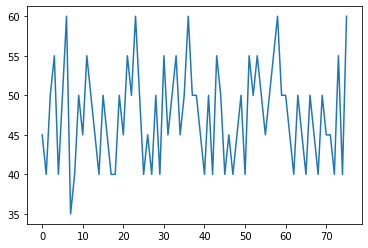

In [7]:
plt.plot(merge_fert["N"])

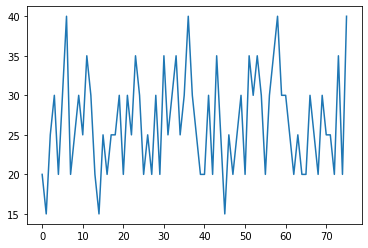

In [8]:
plt.plot(merge_fert["P"])

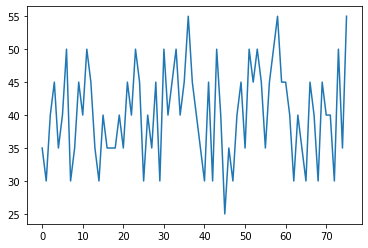

In [9]:
plt.plot(merge_fert["K"])

<AxesSubplot:>

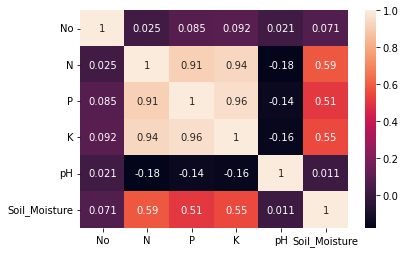

In [10]:
sns.heatmap(merge_fert.corr(),annot=True)

In [11]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [12]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [13]:
temp

,N,P,K
0,60,39,30
1,57,31,39
2,48,19,30
3,41,20,36
4,27,29,40
...,...,...,...
700,40,41,50
701,62,39,60
702,57,58,53
703,65,59,56


In [14]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [15]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,18.886004,84.443365,7.097512,231.756205,almonds,60,39,30
1,1,20.206120,75.814981,5.846184,225.484858,almonds,57,31,39
2,2,23.982253,86.229679,7.316914,289.807288,almonds,48,19,30
3,3,25.356631,79.763802,5.851612,210.140312,almonds,41,20,36
4,4,27.983475,75.002020,6.511620,281.305479,almonds,27,29,40
...,...,...,...,...,...,...,...,...,...
700,700,25.567000,81.789000,5.789000,183.234000,tropicalfruit,40,41,50
701,701,26.678000,82.890000,5.890000,184.345000,tropicalfruit,62,39,60
702,702,27.789000,83.901000,5.901000,185.456000,tropicalfruit,57,58,53
703,703,28.890000,84.012000,6.012000,186.567000,tropicalfruit,65,59,56


In [16]:
del merge_crop['Unnamed: 0']

In [17]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,18.886004,84.443365,7.097512,231.756205,almonds,60,39,30
1,20.206120,75.814981,5.846184,225.484858,almonds,57,31,39
2,23.982253,86.229679,7.316914,289.807288,almonds,48,19,30
3,25.356631,79.763802,5.851612,210.140312,almonds,41,20,36
4,27.983475,75.002020,6.511620,281.305479,almonds,27,29,40
...,...,...,...,...,...,...,...,...
700,25.567000,81.789000,5.789000,183.234000,tropicalfruit,40,41,50
701,26.678000,82.890000,5.890000,184.345000,tropicalfruit,62,39,60
702,27.789000,83.901000,5.901000,185.456000,tropicalfruit,57,58,53
703,28.890000,84.012000,6.012000,186.567000,tropicalfruit,65,59,56


In [18]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [19]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [20]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,60,39,30,18.886004,84.443365,7.097512,231.756205,almonds
1,57,31,39,20.206120,75.814981,5.846184,225.484858,almonds
2,48,19,30,23.982253,86.229679,7.316914,289.807288,almonds
3,41,20,36,25.356631,79.763802,5.851612,210.140312,almonds
4,27,29,40,27.983475,75.002020,6.511620,281.305479,almonds


In [22]:
df.shape

(705, 8)